In [ ]:
!pip install mne
import mne
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers
from tensorflow.keras import utils as np_utils
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file='/content/drive/MyDrive/BCICIV_2a_gdf/A08T.gdf'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

raw=mne.io.read_raw_gdf(file, preload=True, stim_channel='auto', verbose=False)
# Filter settings
low_cut = 4
hi_cut  = 40

raw_filt = raw.copy().filter(low_cut, hi_cut)
#raw.filter(4,40.,fir_design='firwin')
#raw.plot_psd(area_mode='range', tmax=10.0,average=False)
rawdata = raw_filt.get_data()
print(rawdata.shape)
events, event_id = mne.events_from_annotations(raw_filt)
print(events.shape[0])
allLeftData = []
allRightData = []
allFootData = []
allTongueData = []
for i in range(events.shape[0]-1):
  if(events[i,2] == 7):
    leftData = rawdata[:,events[i,0]+125:events[i,0]+1125] 
    allLeftData.append(leftData)
  if(events[i,2] == 8):
    rightData = rawdata[:,events[i,0]+125:events[i,0]+1125]
    allRightData.append(rightData)
  if(events[i,2] == 9):
    footData = rawdata[:,events[i,0]+125:events[i,0]+1125]
    allFootData.append(footData)
  if(events[i,2] == 10):
    tongueData = rawdata[:,events[i,0]+125:events[i,0]+1125]
    allTongueData.append(tongueData)
print(len(allLeftData))
print(len(allRightData))
print(len(allFootData))
print(len(allTongueData))
allLeftData = np.array(allLeftData) # creates an array 
allRightData = np.array(allRightData)
allFootData = np.array(allFootData)
allTongueData = np.array(allTongueData)
allLeftData = allLeftData[:71,:22,:] #creating a matrix with 71 rows, 22 columns and 600 depth. 600 is the window size 
allRightData = allRightData[:71,:22,:]
allFootData = allFootData[:71,:22,:]
allTongueData = allTongueData[:71,:22,:]
print(allLeftData.shape)
print(allRightData.shape)
print(allFootData.shape)
print(allTongueData.shape)

def standardlizeSig(data):
  base = np.mean(data)
  std = np.std(data)
  standardlized_data = (data-base)/std
  del base, std
  return standardlized_data
# def standardlizeSig(data):
#   minft = data.min()
#   maxft = data.max()
#   standardlized_data= ((data - minft)/(maxft - minft))
#   return standardlized_data

allLeftDataTF = []
allRightDataTF = []
allFootDataTF = []
allTongueDataTF = []
for i in range (allLeftData.shape[0]):
  allLeftDataTF.append(standardlizeSig(allLeftData[i,:,:]))
  allRightDataTF.append(standardlizeSig(allRightData[i,:,:]))
  allFootDataTF.append(standardlizeSig(allFootData[i,:,:]))
  allTongueDataTF.append(standardlizeSig(allTongueData[i,:,:]))
allLeftDataTF = np.array(allLeftDataTF) # creates an array 
allRightDataTF = np.array(allRightDataTF)
allFootDataTF = np.array(allFootDataTF)
allTongueDataTF = np.array(allTongueDataTF)

trainleftLabels = [0] * allLeftDataTF.shape[0]
trainrightLabels = [1] * allRightDataTF.shape[0]
trainfootLabels = [2] * allFootDataTF.shape[0]
traintongueLabels = [3] * allTongueDataTF.shape[0]
allTrainLabels = trainleftLabels + trainrightLabels + trainfootLabels + traintongueLabels
allTrainLabels = np.array(allTrainLabels)
allTrainData = np.concatenate((allTongueDataTF, allLeftDataTF, allRightDataTF, allFootDataTF))
X_train, X_rem, Y_train, Y_rem = train_test_split(allTrainData, allTrainLabels, test_size=0.4,random_state=42)
X_validate,X_test,Y_validate,Y_test  = train_test_split(X_rem, Y_rem, test_size=0.1,random_state=42)
print (X_train.shape, Y_train.shape)


/usr/local/lib/python3.7/dist-packages/mne/io/edf/edf.py:1155: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
/usr/lib/python3.7/contextlib.py:119: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


(25, 675270)
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s finished


612
72
72
71
72
(71, 22, 1000)
(71, 22, 1000)
(71, 22, 1000)
(71, 22, 1000)
(170, 22, 1000) (170,)


In [ ]:
# sliding window for train data

TrainData=list()
TrainLabel=list()


step=100
window=500
time   = X_train.shape[2]             # number of time points
begs   = list(range(0, time, step))  
for i in range(X_train.shape[0]):
  for j in begs:
      if j + window <= time:
        TrainData .append(X_train[i:i+1, :, j:j+window])
        TrainLabel .append(Y_train[i])
        

        
TrainData  = np.concatenate(TrainData, axis=0)
TrainLabel = np.array(TrainLabel)



#TrainData=((TrainData - TrainData.min())/(TrainData.max() - TrainData.min()))
print('sliding window is ', TrainData.shape, TrainLabel.shape)

sliding window is  (1020, 22, 500) (1020,)


In [ ]:
ValidData=list()
ValidLabel=list()

time   = X_validate.shape[2]             # number of time points
begs   = list(range(0, time, step))  
for i in range(X_validate.shape[0]):
  for j in begs:
      if j + window <= time:
        ValidData .append(X_validate[i:i+1, :, j:j+window])
        ValidLabel .append(Y_validate[i])
        

        
ValidData  = np.concatenate(ValidData, axis=0)
ValidLabel = np.array(ValidLabel)

#TestData=((TestData - TestData.min())/(TestData.max() - TestData.min()))
print('sliding window is ', ValidData.shape, ValidLabel.shape)

sliding window is  (612, 22, 500) (612,)


In [ ]:
TestData=list()
TestLabel=list()

time   = X_test.shape[2]             # number of time points
begs   = list(range(0, time, step))  
for i in range(X_test.shape[0]):
  for j in begs:
      if j + window <= time:
        TestData .append(X_test[i:i+1, :, j:j+window])
        TestLabel .append(Y_test[i])
        

        
TestData  = np.concatenate(TestData, axis=0)
TestLabel = np.array(TestLabel)

#TestData=((TestData - TestData.min())/(TestData.max() - TestData.min()))
print('sliding window is ', TestData.shape, TestLabel.shape)

sliding window is  (72, 22, 500) (72,)


In [ ]:
kernels, chans, samples = 1, 22, TrainData.shape[2]
TrainData1      = TrainData.reshape(TrainData.shape[0], chans, samples, kernels)
ValidData1  = ValidData.reshape(ValidData.shape[0], chans, samples, kernels)
TestData1  = TestData.reshape(TestData.shape[0], chans, samples, kernels)
TrainLabel1     = np_utils.to_categorical(TrainLabel)
ValidLabel1  = np_utils.to_categorical(ValidLabel)
TestLabel1  = np_utils.to_categorical(TestLabel)


In [ ]:
def DeepConvNet(nb_classes, Chans = 64, Samples = 256,
                dropoutRate = 0.5, version = '2017',last_layer='Conv'):
    """ Keras implementation of the Deep Convolutional Network as described in
    Schirrmeister et. al. (2017), Human Brain Mapping.
    
    This implementation assumes the input is a 2-second EEG signal sampled at 
    128Hz, as opposed to signals sampled at 250Hz as described in the original
    paper. We also perform temporal convolutions of length (1, 5) as opposed
    to (1, 10) due to this sampling rate difference. 
    
    Note that we use the max_norm constraint on all convolutional layers, as 
    well as the classification layer. We also change the defaults for the
    BatchNormalization layer. We used this based on a personal communication 
    with the original authors.
    
                      ours        original paper
    pool_size        1, 2        1, 3
    strides          1, 2        1, 3
    conv filters     1, 5        1, 10
    
    Note that this implementation has not been verified by the original 
    authors. 
    
    """

    if version=='2017':
        bias_spatial = False
        pool = (1,3)
        strid = (1,3)
        filters = (1,10)
    elif version=='2018':
        bias_spatial = True
        pool = (1,2)
        strid = (1,2)
        filters = (1,5)


    # start the modelDeepConvNet(
    input_main   = Input((Chans, Samples, 1),name='Input')
    block1       = Conv2D(25, filters, 
                                 input_shape=(Chans, Samples, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)),name='Conv_1')(input_main)
    block1       = Conv2D(25, (Chans, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)),use_bias=bias_spatial,name='Conv_2')(block1) # Bias False en repo
    block1       = BatchNormalization(epsilon=1e-05, momentum=0.1,name='BatchNormalization_1')(block1)
    block1       = Activation('elu',name='Activation_1')(block1)
    block1       = MaxPooling2D(pool_size=pool, strides=strid,name='MaxPooling_1')(block1)
    block1       = Dropout(dropoutRate,name='DropOut_1')(block1) 
  
    block2       = Conv2D(50, filters,
                                 kernel_constraint = max_norm(2., axis=(0,1,2)),name='Conv_3')(block1)
    block2       = BatchNormalization(epsilon=1e-05, momentum=0.1,name='BatchNormalization_2')(block2)
    block2       = Activation('elu',name='Activation_2')(block2)
    block2       = MaxPooling2D(pool_size=pool, strides=strid,name='MaxPooling_2')(block2)
    block2       = Dropout(dropoutRate,name='DropOut2')(block2)
    
    block3       = Conv2D(100, filters,
                                 kernel_constraint = max_norm(2., axis=(0,1,2)),name='Conv2_4')(block2)
    block3       = BatchNormalization(epsilon=1e-05, momentum=0.1,name='BatchNormalization_3')(block3)
    block3       = Activation('elu',name='Activation_3')(block3)
    block3       = MaxPooling2D(pool_size=pool, strides=strid,name='MaxPooling_3')(block3)
    block3       = Dropout(dropoutRate,name='DropOut3')(block3)
    
    block4       = Conv2D(200, filters,
                                 kernel_constraint = max_norm(2., axis=(0,1,2)),name='Conv2_5')(block3)
    block4       = BatchNormalization(epsilon=1e-05, momentum=0.1,name='BatchNormalization_4')(block4)
    block4       = Activation('elu',name='Activation_4')(block4)
    block4       = MaxPooling2D(pool_size=pool, strides=strid,name='MaxPooling_4')(block4)
    block4       = Dropout(dropoutRate,name='DropOut4')(block4)# igual a repo
    

    # if version=='2017'or last_layer=='Conv':
    #     ConvC        = Conv2D(nb_classes, (1, block4.shape[2]),kernel_constraint = max_norm(0.5, axis=(0,1,2)),name='ouput')(block4)
    #     flat          = Flatten(name='F_1')(ConvC)
    #     softmax      = Activation('softmax',name='out_activation')(flat)

    if version=='2017' or last_layer=='Conv':
        flatten      = Flatten(name='F_1')(block4)
        dense        = Dense(nb_classes, kernel_constraint = max_norm(0.5),name='output')(flatten)
        softmax      = Activation('softmax',name='out_activation')(dense)
    
    return Model(inputs=input_main, outputs=softmax)

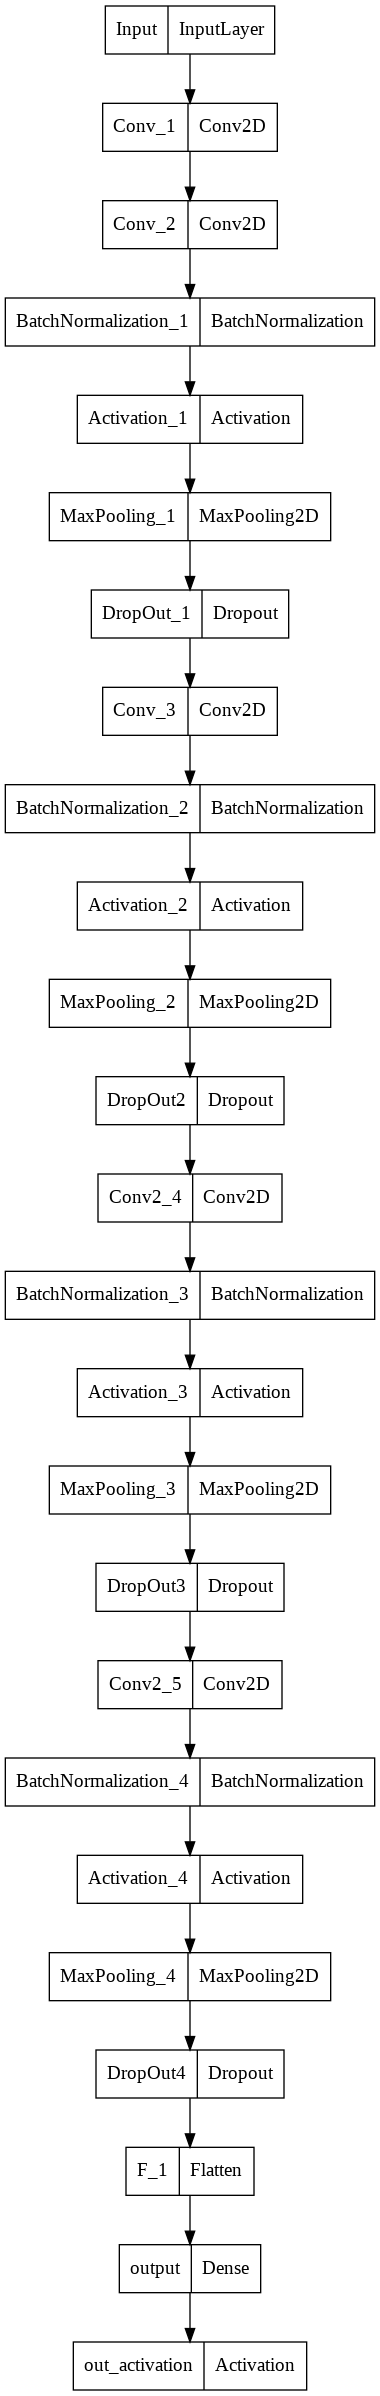

In [ ]:
model=DeepConvNet(nb_classes=4, Chans = 22, Samples = 500, dropoutRate = 0.5,version = '2017',last_layer='Dense')
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['accuracy'])

tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)


In [ ]:

#es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)
fittedModel = model.fit(TrainData1, TrainLabel1, batch_size = 64, epochs = 750, 
                        validation_data=(ValidData1, ValidLabel1))
                       
                        

Epoch 1/750
16/16 [==============================] - 18s 128ms/step - loss: 1.6627 - accuracy: 0.2284 - val_loss: 1.4115 - val_accuracy: 0.2026
Epoch 2/750
16/16 [==============================] - 0s 25ms/step - loss: 1.5208 - accuracy: 0.2500 - val_loss: 1.3783 - val_accuracy: 0.3415
Epoch 3/750
16/16 [==============================] - 0s 26ms/step - loss: 1.5031 - accuracy: 0.2559 - val_loss: 1.3559 - val_accuracy: 0.3529
Epoch 4/750
16/16 [==============================] - 0s 27ms/step - loss: 1.4673 - accuracy: 0.2549 - val_loss: 1.3290 - val_accuracy: 0.3644
Epoch 5/750
16/16 [==============================] - 0s 23ms/step - loss: 1.4201 - accuracy: 0.3186 - val_loss: 1.2959 - val_accuracy: 0.3725
Epoch 6/750
16/16 [==============================] - 0s 29ms/step - loss: 1.3871 - accuracy: 0.3373 - val_loss: 1.2547 - val_accuracy: 0.4036
Epoch 7/750
16/16 [==============================] - 0s 15ms/step - loss: 1.3423 - accuracy: 0.3471 - val_loss: 1.2186 - val_accuracy: 0.4150
Epoc

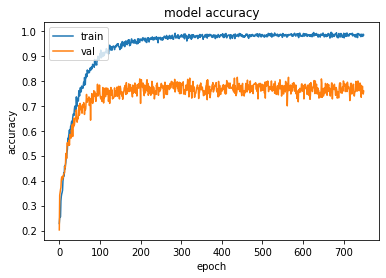

In [ ]:
plt.plot(fittedModel.history['accuracy'])
plt.plot(fittedModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

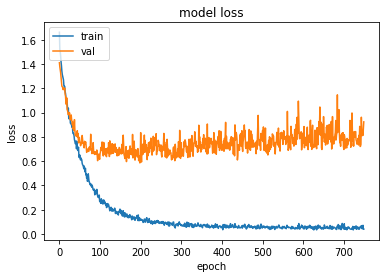

In [ ]:
plt.plot(fittedModel.history['loss'])
plt.plot(fittedModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(np.mean(fittedModel.history['val_accuracy']))

0.748032682955265


In [ ]:
model.evaluate(TestData1, TestLabel1)
print(TestData1.shape,TestLabel1.shape)

3/3 [==============================] - 0s 49ms/step - loss: 0.9155 - accuracy: 0.7500
(72, 22, 500, 1) (72, 4)


In [ ]:
predictions = model.predict(TestData1)
pred_classes = np.argmax(predictions, axis = 1)
actual_classes = np.argmax(TestLabel1, axis = 1)
print(pred_classes, actual_classes)


[1 0 0 2 2 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 2 2 3 0 0 0 1 1 1 2 2 2 2 2 0 0
 2 1 1 0 0 0 0 0 0 0 0 3 1 3 3 1 2 3 3 3 3 3 3 1 1 0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0]


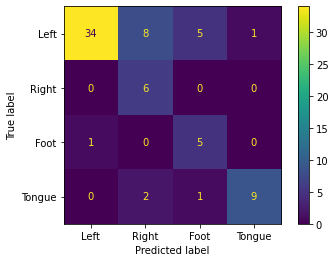

The accuracy is 75.0 %


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics



confusion_matrix = metrics.confusion_matrix(actual_classes, pred_classes)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Left','Right','Foot','Tongue'])

cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(actual_classes, pred_classes)
print('The accuracy is',Accuracy*100, '%')